#Coursework 06 - Part 1



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy.ndimage import rotate

# Utility: Calculate classification accuracy
def accuracy(predictions, labels):
    correct = ((predictions[:, 0] - labels) == 0).astype(float)
    return np.sum(correct) / len(labels) * 100

# Sigmoid activation with a small multiplier (to slow down gradient updates)
def sigmoid(x):
    return 1 / (1 + np.exp(-0.0001 * x))

# Constants
IMAGE_SIZE = 28
INPUT_SIZE = IMAGE_SIZE * IMAGE_SIZE
EPOCHS = 20
TARGET_DIGITS = [3, 8]



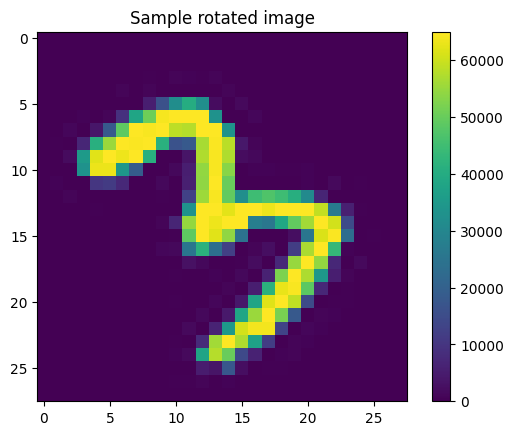

In [ ]:
# Load and preprocess MNIST data (optionally add rotated images)
def load_data(rotation_angle=0, include_rotated_in_train=True):
    (train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

    # Select only the target digits for training and testing
    train_indices = np.where(np.isin(train_labels, TARGET_DIGITS))[0]
    test_indices = np.where(np.isin(test_labels, TARGET_DIGITS))[0]

    train_data = train_images[train_indices]
    train_targets = (train_labels[train_indices] == TARGET_DIGITS[1]).astype(float)

    test_data = test_images[test_indices]
    test_targets = (test_labels[test_indices] == TARGET_DIGITS[1]).astype(float)

    # Optionally add rotated versions of training and test data
    if rotation_angle != 0 and include_rotated_in_train:
        rotated_train = np.array([rotate(img, rotation_angle, reshape=False) for img in train_data])
        rotated_train = rotated_train.reshape(len(rotated_train), -1) * 255.0
        rotated_train = np.hstack((rotated_train, np.ones((len(rotated_train), 1))))
        train_data_flat = train_data.reshape(len(train_data), -1)
        train_data_flat = np.hstack((train_data_flat, np.ones((len(train_data), 1))))

        train_data_combined = np.vstack((train_data_flat, rotated_train))
        train_targets_combined = np.concatenate((train_targets, train_targets))
    else:
        train_data_combined = train_data.reshape(len(train_data), -1)
        train_data_combined = np.hstack((train_data_combined, np.ones((len(train_data_combined), 1))))
        train_targets_combined = train_targets

    if rotation_angle != 0:
        rotated_test = np.array([rotate(img, rotation_angle, reshape=False) for img in test_data])
        rotated_test = rotated_test.reshape(len(rotated_test), -1) * 255.0
        rotated_test = np.hstack((rotated_test, np.ones((len(rotated_test), 1))))
        test_data_flat = test_data.reshape(len(test_data), -1)
        test_data_flat = np.hstack((test_data_flat, np.ones((len(test_data_flat), 1))))

        test_data_combined = np.vstack((test_data_flat, rotated_test))
        test_targets_combined = np.concatenate((test_targets, test_targets))
    else:
        test_data_combined = test_data.reshape(len(test_data), -1)
        test_data_combined = np.hstack((test_data_combined, np.ones((len(test_data_combined), 1))))
        test_targets_combined = test_targets

    return train_data_combined, train_targets_combined, test_data_combined, test_targets_combined

# Visualize a training sample
sample_train_data, _, _, _ = load_data(45, include_rotated_in_train=True)
plt.imshow(sample_train_data[22000, :-1].reshape(28, 28))
plt.colorbar()
plt.title("Sample rotated image")
plt.show()

Epoch 1, Average Error: 0.1311
Epoch 2, Average Error: 0.0744
Epoch 3, Average Error: 0.0617
Epoch 4, Average Error: 0.0551
Epoch 5, Average Error: 0.0509
Epoch 6, Average Error: 0.0480
Epoch 7, Average Error: 0.0458
Epoch 8, Average Error: 0.0440
Epoch 9, Average Error: 0.0426
Epoch 10, Average Error: 0.0414
Epoch 11, Average Error: 0.0404
Epoch 12, Average Error: 0.0395
Epoch 13, Average Error: 0.0387
Epoch 14, Average Error: 0.0380
Epoch 15, Average Error: 0.0374
Epoch 16, Average Error: 0.0369
Epoch 17, Average Error: 0.0364
Epoch 18, Average Error: 0.0359
Epoch 19, Average Error: 0.0355
Epoch 20, Average Error: 0.0351
Test accuracy at -90 degrees rotation: 73.87%


<ipython-input-12-1422381c1497>:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-0.0001 * x))


Test accuracy at -70 degrees rotation: 75.50%
Test accuracy at -50 degrees rotation: 78.38%
Test accuracy at -30 degrees rotation: 88.56%
Test accuracy at -10 degrees rotation: 96.17%
Test accuracy at 10 degrees rotation: 95.84%
Test accuracy at 30 degrees rotation: 86.01%
Test accuracy at 50 degrees rotation: 72.18%
Test accuracy at 70 degrees rotation: 69.83%
Test accuracy at 90 degrees rotation: 72.18%


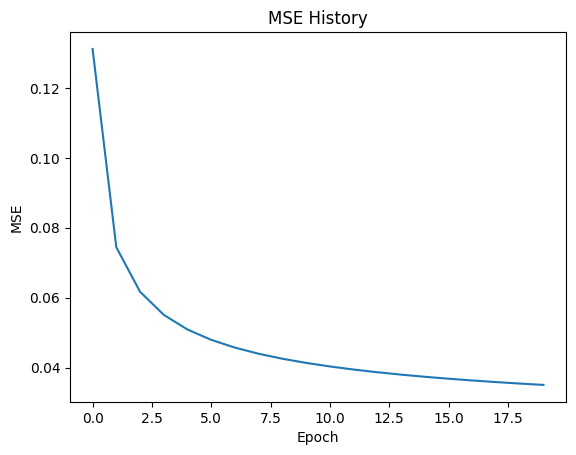

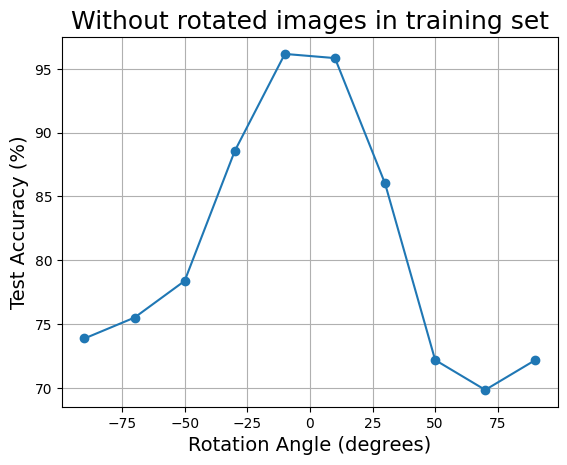

In [ ]:
# Run ADALINE with varying rotation angles (without augmented training set)
angles = np.linspace(-90, 90, 10).astype(int)
accuracy_results = []
trained = False
for angle in angles:
    train_x, train_y, test_x, test_y = load_data(rotation_angle=angle, include_rotated_in_train=False)

    if not trained:
      weights = np.random.rand(INPUT_SIZE + 1, 1)
      mse_history = []
      for epoch in range(EPOCHS):
          errors = []
          for i in range(len(train_x)):
              output = sigmoid(np.dot(train_x[i], weights))
              error = train_y[i] - output

              gradient = 0.0001 * train_x[i] * output * (1 - output)
              errors.append(error)
              weights += gradient.reshape(-1, 1) * error

          print(f"Epoch {epoch + 1}, Average Error: {np.mean(np.abs(errors)**2):.4f}")
          mse_history.append(np.mean(np.abs(errors)**2))
      trained = True

    test_output = sigmoid(np.dot(test_x, weights))
    predictions = (test_output > 0.5).astype(float)

    acc_score = accuracy(predictions, test_y)
    accuracy_results.append(acc_score)
    print(f"Test accuracy at {angle} degrees rotation: {acc_score:.2f}%")

plt.figure()
plt.plot(mse_history)
plt.title("MSE History")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

plt.plot(angles, accuracy_results, '-o')
plt.title("Without rotated images in training set", fontsize=18)
plt.xlabel("Rotation Angle (degrees)", fontsize=14)
plt.ylabel("Test Accuracy (%)", fontsize=14)
plt.grid(True)
plt.show()


<ipython-input-12-1422381c1497>:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-0.0001 * x))


Test accuracy at -90 degrees rotation (with augmentation): 92.24%
Test accuracy at -70 degrees rotation (with augmentation): 88.46%
Test accuracy at -50 degrees rotation (with augmentation): 91.68%
Test accuracy at -30 degrees rotation (with augmentation): 92.21%
Test accuracy at -10 degrees rotation (with augmentation): 95.67%
Test accuracy at 10 degrees rotation (with augmentation): 95.94%
Test accuracy at 30 degrees rotation (with augmentation): 92.92%
Test accuracy at 50 degrees rotation (with augmentation): 90.17%
Test accuracy at 70 degrees rotation (with augmentation): 91.36%
Test accuracy at 90 degrees rotation (with augmentation): 91.91%


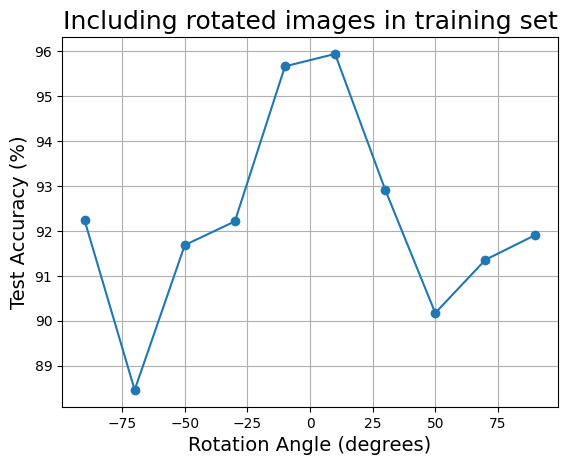

In [ ]:

# Run ADALINE again, now including rotated images in training set
accuracy_results = []

for angle in angles:
    train_x, train_y, test_x, test_y = load_data(rotation_angle=angle, include_rotated_in_train=True)
    weights = np.random.rand(INPUT_SIZE + 1, 1)

    for epoch in range(EPOCHS):
        for i in range(len(train_x)):
            output = sigmoid(np.dot(train_x[i], weights))
            error = train_y[i] - output
            gradient = 0.0001 * train_x[i] * output * (1 - output)
            weights += gradient.reshape(-1, 1) * error

    test_output = sigmoid(np.dot(test_x, weights))
    predictions = (test_output > 0.5).astype(float)

    acc_score = accuracy(predictions, test_y)
    accuracy_results.append(acc_score)
    print(f"Test accuracy at {angle} degrees rotation (with augmentation): {acc_score:.2f}%")

plt.plot(angles, accuracy_results, '-o')
plt.title("Including rotated images in training set", fontsize=18)
plt.xlabel("Rotation Angle (degrees)", fontsize=14)
plt.ylabel("Test Accuracy (%)", fontsize=14)
plt.grid(True)
plt.show()
